
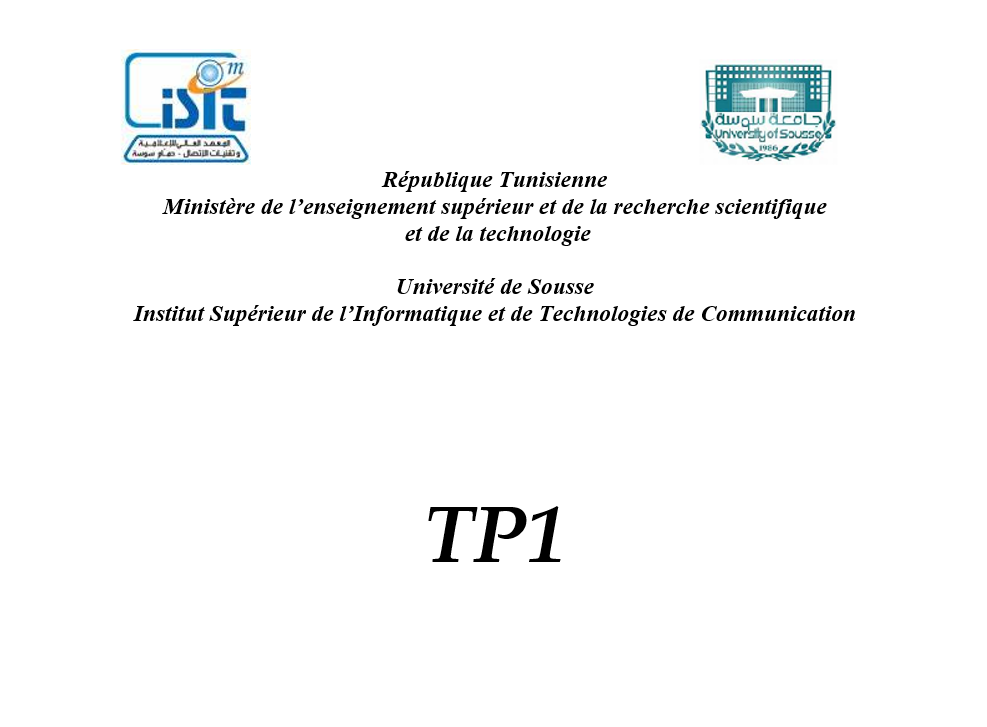



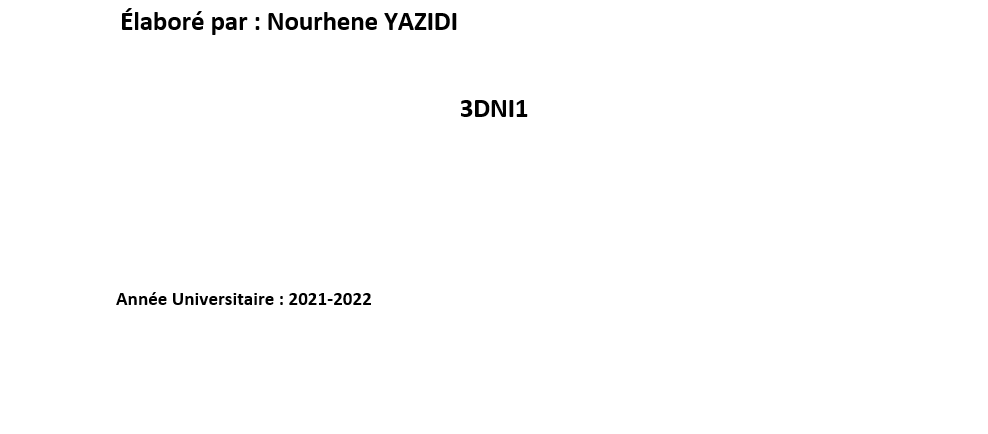


### Importer les bibliothèques **numpy** et **pandas** et importer functools de reduce

In [9]:
import numpy as np
import pandas as pd
from functools import reduce

# PART I

Explorer la dataset `BL-Flickr-Images-Book.csv` 

**NB:** faites attentions au chemin

## 1 Exploration du dataset

In [10]:
# Exporter BL-Flickr-Images-Book.csv dans un data frame nomé df
df = pd.read_csv('Datasets/BL-Flickr-Images-Book.csv')

# Afficher les 5 premières lignes
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


## 2 Jeter un coup d'oeil dans le dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

## 3 Qu'est ce que vous remarquez?

On constate l'existance des colonnes totalement vides et des colonnes contenant des données manquantes.
Il faut donc supprimer les colonnes totalement vides et essayer de corriger les données manquqntes

## 4 Dropping unnecessary columns

Nous allons restreindre l'étude à seulement 7 colonnes pour cela nous allons supprimer 7 colonnes que nous jugeons unitiles por le moment :

```Python
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']```

In [12]:
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

#Eliminer les colonnes dans la liste de to_drop du dataframe df
df.drop(to_drop, inplace= True, axis= 1)
#Afficherle résultat
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


## 5 Setting the index of the dataset
Changer l'index pourqu'ille prenne la valeur de l'identifiant `Identifier`

In [13]:
###Changerl'index 
df.set_index('Identifier',inplace=True)
###Afficher le résultat
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


## 6 Donner un appérçu sur la colonne `Date of Publication` 


In [14]:
### Afficher  les 25 premières valeurs de Date of Publication
df['Date of Publication'].head(25)

Identifier
206            1879 [1878]
216                   1868
218                   1869
472                   1851
480                   1857
481                   1875
519                   1872
667                    NaN
874                   1676
1143                  1679
1280                  1802
1808                  1859
1905                  1888
1929           1839, 38-54
2836                  1897
2854                  1865
2956               1860-63
2957                  1873
3017                  1866
3131                  1899
4598                  1814
4884                  1820
4976                  1800
5382    1847, 48 [1846-48]
5385               [1897?]
Name: Date of Publication, dtype: object

> Remarque : Observer la date de publication qui correspond à l'index 206.
> Ca nécessite un nettoyage et une correction : il faut éliminer certains symboles 

## 7 Cleaning columns using the `.apply` function

### Ecrire une fonction qui permet de nettoyer la colonne des dates 

In [15]:
unwanted_characters = ['[', ',', '-']
# Completer la fonction suivante
def clean_dates(item):
    dop= str(item.loc['Date of Publication'])
    
    if dop == 'nan' or dop[0] == '[':
        return np.NaN
        
    for character in unwanted_characters:
        if character in dop:
            
            character_index = dop.find(character)
            dop = dop[:character_index]


    
    return dop

df['Date of Publication'] = df.apply(clean_dates, axis = 1)

In [16]:
df.head(25)

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
481,London,1875,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
874,London],1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,http://www.flickr.com/photos/britishlibrary/ta...


In [17]:
#Voici une autre méthode
#exécuter pour voir le résultat
unwanted_characters = ['[', ',', '-']

def clean_dates(dop):
    dop = str(dop)
    if dop.startswith('[') or dop == 'nan':
        return 'NaN'
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    return dop

df['Date of Publication'] = df['Date of Publication'].apply(clean_dates)
df.head(10)

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
481,London,1875,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
874,London],1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,http://www.flickr.com/photos/britishlibrary/ta...


## 8 Observer la collone `Author`
### Completer la fonction `clean_author_names`qui permet de corriger les valeurs de cet colonne

In [18]:
# compléter la fonction suivante ( à la place de pass)
def clean_author_names(author):
    
    author = str(author)
    
    if author == 'nan':
        return 'NaN'
    
    author = author.split(',')

    if len(author) == 1:
        name = filter(lambda x: x.isalpha(), author[0])
        return reduce(lambda x, y: x + y, name)
    
    last_name, first_name = author[0], author[1]

    first_name = first_name[:first_name.find('-')] if '-' in first_name else first_name
    
    if first_name.endswith(('.', '.|')):
        parts=first_name.split('.')
        
        if len(parts) > 1:
            first_occurence = first_name.find('.')
            final_occurence = first_name.find('.', first_occurence +1)
            first_name= first_name[:first_occurence]
        else:
            first_name = first_name[:first_name.find('.')]
    
    last_name = last_name.capitalize()
    
    return f'{first_name} {last_name}'


df['Author'] = df['Author'].apply(clean_author_names)

# Résultat attendu 

In [19]:
df.head(10)

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,AA,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,A A.,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,A A.,http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...",E A.,http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...",E A.,http://www.flickr.com/photos/britishlibrary/ta...
481,London,1875,William Macintosh,"[The World in which I live, and my place in it...",E A.,http://www.flickr.com/photos/britishlibrary/ta...
519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,F A.,http://www.flickr.com/photos/britishlibrary/ta...
667,"pp. 40. G. Bryan & Co: Oxford, 1898",NaN,NaN,"The Coming of Spring, and other poems. By J. A...",J A.,http://www.flickr.com/photos/britishlibrary/ta...
874,London],1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ,http://www.flickr.com/photos/britishlibrary/ta...


##  Observer la colone `title`
### 9 Completer la fonction `clean_title`qui permet de corriger les valeurs de cet colonne

# Résultat attendu 


In [20]:
## complétrer la fonction suivante ( à la place de pass)

def clean_title(title):
    
    if title == 'nan':
        return 'NaN'
    
    if title[0] == '[':
        title = title[1: title.find(']')]
        
    if 'by' in title:
        title = title[:title.find('by')]
    elif 'By' in title:
        title = title[:title.find('By')]
        
    if '[' in title:
        title = title[:title.find('[')]

    title = title[:-2]
        
    title = list(map(str.capitalize, title.split()))
    return ' '.join(title)
    
df['Title'] = df['Title'].apply(clean_title)
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All For Greed,A A.,http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A A.,http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E A.,http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E A.,http://www.flickr.com/photos/britishlibrary/ta...


# PART II
## 1 Cleaning entire dataset
### On considère le fichier suivant 'university_towns.txt'

In [21]:
!head Datasets/university_towns.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
with open('Datasets/university_towns.txt', 'r') as text:
    textfile = text.read()
    print(textfile)

Alabama[edit]
Auburn (Auburn University)[1]
Florence (University of North Alabama)
Jacksonville (Jacksonville State University)[2]
Livingston (University of West Alabama)[2]
Montevallo (University of Montevallo)[2]
Troy (Troy University)[2]
Tuscaloosa (University of Alabama, Stillman College, Shelton State)[3][4]
Tuskegee (Tuskegee University)[5]
Alaska[edit]
Fairbanks (University of Alaska Fairbanks)[2]
Arizona[edit]
Flagstaff (Northern Arizona University)[6]
Tempe (Arizona State University)
Tucson (University of Arizona)
Arkansas[edit]
Arkadelphia (Henderson State University, Ouachita Baptist University)[2]
Conway (Central Baptist College, Hendrix College, University of Central Arkansas)[2]
Fayetteville (University of Arkansas)[7]
Jonesboro (Arkansas State University)[8]
Magnolia (Southern Arkansas University)[2]
Monticello (University of Arkansas at Monticello)[2]
Russellville (Arkansas Tech University)[2]
Searcy (Harding University)[5]
California[edit]
Angwin (Pacific Union College

## 2 Créer un pandas data frame à partir d'un fichier txt
On veut créer un DataFrame nommé `towns_df` à partir du fichier 'university_towns.txt'

Nous voyons que nous avons des noms d'états périodiques suivis des villes universitaires de cet état: StateA TownA1 TownA2 StateB TownB1 TownB2 .... Si nous regardons la façon dont les noms d'états sont écrits dans le fichier, nous verrons qu'ils ont tous la sous-chaîne «[edit]» en eux.

Nous pouvons tirer parti de ce modèle en créant une liste de tuples (état, ville) et en enveloppant cette liste dans un DataFrame:


In [23]:
university_towns = []
with open('Datasets/university_towns.txt') as file:
    for line in file:
        if '[edit]' in line:
             # se rappeler de ce `state` jusqu'à ce qu'on trouve le suivant
            state = line
        else:
             # Sinon, nous avons une ville; garder `state` 
            university_towns.append((state,line))

university_towns[:5]

[('Alabama[edit]\n', 'Auburn (Auburn University)[1]\n'),
 ('Alabama[edit]\n', 'Florence (University of North Alabama)\n'),
 ('Alabama[edit]\n', 'Jacksonville (Jacksonville State University)[2]\n'),
 ('Alabama[edit]\n', 'Livingston (University of West Alabama)[2]\n'),
 ('Alabama[edit]\n', 'Montevallo (University of Montevallo)[2]\n')]

In [24]:
towns_df = pd.DataFrame(university_towns,
                        columns=['State', 'RegionName'])
towns_df.head()

,State,RegionName
0,Alabama[edit]\n,Auburn (Auburn University)[1]\n
1,Alabama[edit]\n,Florence (University of North Alabama)\n
2,Alabama[edit]\n,Jacksonville (Jacksonville State University)[2]\n
3,Alabama[edit]\n,Livingston (University of West Alabama)[2]\n
4,Alabama[edit]\n,Montevallo (University of Montevallo)[2]\n


## 3 Compléter la fonction `clean_up` pour nettoyer les colonnes de `towns_df`

In [25]:
## complétrer la fonction suivante ( à la place de pass)
def clean_up(item):
    if '(' in item:
        pass
        return item[:item.find('(') - 1]
    
    if '[' in item:
        return item[:item.find('[')]
    

towns_df =  towns_df.applymap(clean_up)
towns_df

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
...,...,...
512,Wisconsin,River Falls
513,Wisconsin,Stevens Point
514,Wisconsin,Waukesha
515,Wisconsin,Whitewater


# PART III ( OPTIONNELLE) 
## 1 Renaming columns and skipping rows
### 1.1 Convertir le fichier `olympics.csv` en dataframe pandas `olympics_df`

In [26]:
# exporter 'olympics.csv' sous forme de data frame nommé olympics_df
olympics_df = pd.read_csv('Datasets/olympics.csv')

# Afficher les 5 premières lignes
olympics_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


### 1.2 Supprimer la première ligne 

In [27]:
# exporter 'olympics.csv' sous forme de data frame nommé olympics_df en supprimant la première ligne

olympics_df = pd.read_csv('./Datasets/olympics.csv', skiprows = 1, header = 0)

# Afficher les 5 premières lignes
olympics_df.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


### 1.3 Changer le nom des colonnes en utilisant le dictionnaire suivant :
```python
new_names =  {'Unnamed: 0': 'Country',
              '? Summer': 'Summer Olympics',
              '01 !': 'Gold',
              '02 !': 'Silver',
              '03 !': 'Bronze',
              '? Winter': 'Winter Olympics',
              '01 !.1': 'Gold.1',
              '02 !.1': 'Silver.1',
              '03 !.1': 'Bronze.1',
              '? Games': '# Games', 
              '01 !.2': 'Gold.2',
              '02 !.2': 'Silver.2',
              '03 !.2': 'Bronze.2'}


```



In [28]:
# Changer le nom des colonnes en utilisant le dictionnaire new_names
new_names =  {'Unnamed: 0': 'Country',
              '? Summer': 'Summer Olympics',
              '01 !': 'Gold',
              '02 !': 'Silver',
              '03 !': 'Bronze',
              '? Winter': 'Winter Olympics',
              '01 !.1': 'Gold.1',
              '02 !.1': 'Silver.1',
              '03 !.1': 'Bronze.1',
              '? Games': '# Games', 
              '01 !.2': 'Gold.2',
              '02 !.2': 'Silver.2',
              '03 !.2': 'Bronze.2'}
olympics_df.rename(columns= new_names, inplace = True)
# Afficher les 5 premières lignes

In [29]:
olympics_df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
